### Theory of GAN (Generative Adversarial Networks):

GANs consist of two neural networks: a generator and a discriminator, which are trained simultaneously through a competitive process.

1. **Generator (G)**: This network takes random noise as input and generates fake data samples (in our case, fashion images).

2. **Discriminator (D)**: This network aims to distinguish between real (from the training set) and fake (generated by the generator) samples.

During training, the generator tries to produce samples that are indistinguishable from real data, while the discriminator tries to correctly classify real and fake samples. As training progresses, both networks improve until the generator produces high-quality samples.

### Building Generator and Discriminator Models for Fashion MNIST:

#### 1. Generator Model:
- Input: Random noise vector (latent space).
- Output: Synthetic fashion images.
- Architecture: Typically consists of transpose convolution layers followed by activation functions like ReLU and a sigmoid function at the output to scale pixel values between 0 and 1.

#### 2. Discriminator Model:
- Input: Fashion images (real or synthetic).
- Output: Probability of the input being real.
- Architecture: Convolutional layers followed by activation functions like LeakyReLU, and finally a sigmoid function to produce a probability score.

Let's code the generator and discriminator models:

```python
import tensorflow as tf
from tensorflow.keras import layers, Sequential

# Generator model
def build_generator(latent_dim):
    model = Sequential([
        layers.Dense(7 * 7 * 256, input_dim=latent_dim),
        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', activation='sigmoid')
    ])
    return model

# Discriminator model
def build_discriminator(input_shape):
    model = Sequential([
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=input_shape),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Define the latent space dimension
latent_dim = 100

# Build the generator
generator = build_generator(latent_dim)

# Build and compile the discriminator
input_shape = (28, 28, 1)
discriminator = build_discriminator(input_shape)
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summaries
generator.summary()
discriminator.summary()
```

These models define the architecture for the generator and discriminator. Now, you can train them using Fashion MNIST data. If you need help with training or further explanation, feel free to ask!

# 1. Importing Dependencies and Data

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import numpy as np
import keras


In [2]:
# Setting GPU memory growth
gpus = tf.config.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
# gpus

## Import Dataset and Preprocess 

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [5]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## class labels

In [6]:
train_dataset = tf.data.Dataset.from_tensor_slices((tf.expand_dims(x_train/255, axis=-1), y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((tf.expand_dims(x_test/255, axis=-1), y_test))


# Optionally shuffle, batch, Cache and prefetch the dataset
batch_size = 128
train_dataset = train_dataset.shuffle(buffer_size=len(x_train))

train_ds = train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

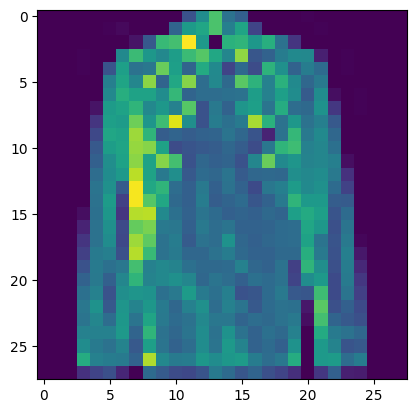

In [7]:
dataiterator = train_dataset.as_numpy_iterator()
plt.imshow(dataiterator.next()[0])

In [8]:
dataiterator.next()[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.27843137],
        [0.13333333],
        [0.34117647],
        [0.64705882],
        [0.36470588],
        [0.03137255],
        [0.13333333],
        [0.16470588],
        [0.17254902],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.0627451 ],
        [0.64705882],
        [0.61568627],
        [0.58823529],
        [0.70980392],
        [1.        ],
        [0.67843137],
        [0.61568627],
        

In [9]:
train_ds.as_numpy_iterator().next()[0].shape

(128, 28, 28, 1)

## Class Names

In [10]:
class_labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

# 2. Visualise Data

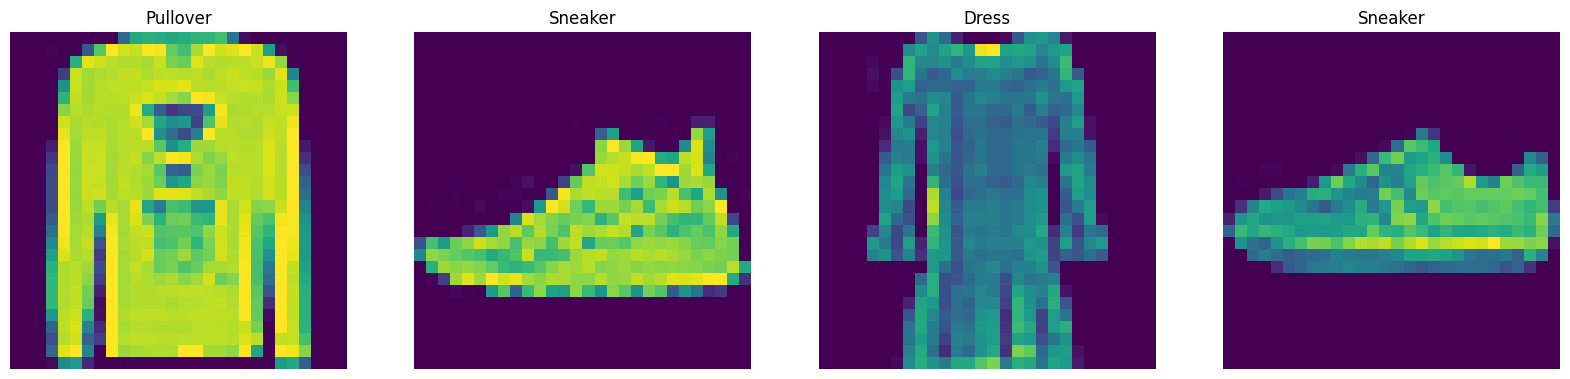

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))  # Create a figure with 1 row and 4 columns

# Generate 4 random indices
random_indices = random.sample(range(len(x_train)), 4)

for i, idx in enumerate(random_indices):
    ax[i].imshow(x_train[idx])
    ax[i].axis('off')  # Turn off axis
    ax[i].set_title(f'{class_labels[y_train[idx]]}')  # Set title for each image

plt.show()



# 3. Build Neural Networks

## 3.1 Import Modelling Components

In [12]:
# Bring in the Sequential api for the generator and discriminator
from keras.models import Sequential
from keras.layers import Conv2D , Dense , Flatten , UpSampling2D , ReLU , LeakyReLU , Dropout , BatchNormalization , Reshape, Conv2DTranspose


## 3.2 Generator model

In [13]:
# Reset TensorFlow graph
tf.keras.backend.clear_session()

In [14]:
def build_generator(latent_dim):
    model = Sequential([
        Dense(7 * 7 * 128, input_dim=latent_dim),
        LeakyReLU(0.2),
        Reshape((7, 7, 128)),
        
        UpSampling2D(),
        Conv2D(128, 5, padding='same'),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        
        UpSampling2D(),
        Conv2D(128, 5, padding='same'),
        LeakyReLU(alpha=0.2),
        

        Conv2D(128, 5, padding='same'),
        LeakyReLU(alpha=0.2),
        
        Conv2D(128, 5, padding='same'),
        LeakyReLU(alpha=0.2),
        BatchNormalization(),
        
        LeakyReLU(alpha=0.2),
        Conv2D(1 , 5, padding='same',activation="sigmoid")
        
    ])
    return model
generator = build_generator((128))
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 128)      512       
 ormalization)                                          

1/1 [==============================] - 1s 714ms/step


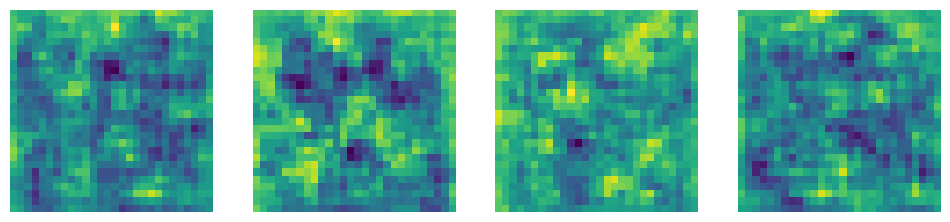

In [15]:
img = generator.predict(np.random.randn(4, 128,1))

# Choose random indices from the training dataset
random_indices = random.sample(range(len(x_train)), 4)

# Plot the images
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
for i, idx in enumerate(random_indices):
    ax[i].imshow(img[i].squeeze())  # Assuming grayscale images
    ax[i].axis('off')
plt.show()

## 3.3 Build Discriminator

In [16]:
def build_Dicriminator():
    model=Sequential([
        # First Conv Block
        Conv2D(32, 5 , input_shape=(28,28,1)),
        LeakyReLU(0.2),
        Dropout(0.4),
        
        # second conv Block
        Conv2D(64, 5, input_shape=(28,28,1)),
        LeakyReLU(0.2),
        Dropout(0.4),
        
        #third conv Block
        Conv2D(128, 5 , input_shape=(28,28,1)),
        LeakyReLU(0.2),
        Dropout(0.4),
        
        # Forth Conv Block
        Conv2D(256, 5 , input_shape=(28,28,1)),
        LeakyReLU(0.2),
        Dropout(0.4),
        
         # Fifth Conv Block
        Conv2D(256, 5 , input_shape=(28,28,1)),
        LeakyReLU(0.2),
        Dropout(0.4),
        
        Flatten(),
        Dropout(0.4),
        Dense(1 , activation="sigmoid")
        
    ])
    return model

discriminator = build_Dicriminator()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [17]:
discriminator.predict(img)

1/1 [==============================] - 0s 96ms/step


array([[0.5049162 ],
       [0.50489146],
       [0.5049657 ],
       [0.5049088 ]], dtype=float32)

# 4. Traning Loop

## 4.1 Setup Losses and Optimizers

In [19]:
# Adam is going to be the optimizer for both
from keras.optimizers import Adam
# BinaryCrossentropy is going to be the optimizer for both
from keras.losses import BinaryCrossentropy

In [20]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)

g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

## 4.2 Build Subclassed Model

In [21]:
from tensorflow.keras.models import Model

In [29]:
class FashionGAN(Model):
    def __init__(self, generator , discriminator , *args , **kwargs):
        super().__init__(*args , **kwargs)
        
        self.generator = generator
        self.discriminator = discriminator
        
    def compile_model(self,g_opt,d_opt , g_loss, d_loss , *args , **kwargs):
        # compile with base class
        super().compile_model(*args , **kwargs)
        
        # Create attributes for losses and Optimizers
        self.g_opt = g_opt
        self.g_loss=g_loss
        
        self.d_opt=d_opt
        self.d_loss = d_loss
    
    def train_step(self,batch):
        real_images = batch
        fake_images = self.generator(np.random.normal((128,128,1)),training=False)
        
        #Train the Discriminator
        with tf.GradientTape() as dtape:
            
            # pass and real images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images , training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis = 0)
            
            # Create labels for real and fake images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)],axis = 0)

            # add some noise to the outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = 0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real , noise_fake],axis =0)

            #Calculate Fake
            total_d_loss = self.d_loss(y_realfake , yhat_realfake)
            
        # Apply backpropogation - nn learn
        dgrad = dtape.gradient(total_d_loss , self.discriminator.trainable_variables)
        self.d_opt.apply_gradient(zip(dgrad , self.discriminator.trainable_variables))
        
        # train the generator
        with tf.gradient_tape as gtape:
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)),training = True)

            # create the predicted label
            predicted_label = self.discriminator(gen_images , training = False)
                        
            # calculate loss
            total_g_loss = self.g_loss(tf.zero_likes(predicted_label),predicted_label)

        # apply backprop
        ggrad = gtape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradient(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss" :total_d_loss , "g_loss": total_g_loss}

## 4.3 Build Callback


In [31]:
#Create instance of Subclass mode
fashgan=FashionGAN(generator , discriminator)

In [32]:
# Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

In [33]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [34]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

## 4.4 Train

In [36]:
# Recommend 2000 epochs
hist = fashgan.fit(train_ds, epochs=20, callbacks=[ModelMonitor()])

Epoch 1/20


ValueError: in user code:

    File "C:\Users\vpved\anaconda3\envs\tfdirectml\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\vpved\anaconda3\envs\tfdirectml\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\vpved\anaconda3\envs\tfdirectml\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\vpved\AppData\Local\Temp\ipykernel_22096\3606147211.py", line 21, in train_step
        fake_images = self.generator(np.random.normal((128,128,1)),training=False)
    File "C:\Users\vpved\anaconda3\envs\tfdirectml\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\vpved\anaconda3\envs\tfdirectml\lib\site-packages\keras\engine\input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" "                 f"(type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (3,)
    
    Call arguments received by layer "sequential" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(3,), dtype=float64)
      • training=False
      • mask=None


## 4.5 Review Performance

# 5 Test out generator

## 5.1 Generate Images

## 5.2 Save the Model